In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

import pymeteo
import metpy

import cartopy
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy import plots

from pymeteo.data import acars

%matplotlib inline

In [2]:
 datasets = acars.getAvailableDatasets()

[+] Fetching list of resources available
[-] Parsing list


In [3]:
datasets[-1]

'20220505_1100.gz'

In [4]:
setme = acars.getDataSet(datasets[-1])
pset = acars.processDataSet(setme, passthrough=True)

[+] Fetching dataset 20220505_1100.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 53 profiles


In [5]:
pset[-7]

{'i': 40,
 'n': 23,
 'z': array([ -25.999998,   35.      ,  116.      ,  206.      ,  287.      ,
         347.      ,  414.      ,  447.      ,  482.      ,  540.      ,
         650.      ,  783.      ,  845.00006 ,  868.      , 1026.      ,
        1282.9999  , 1529.      , 1872.      , 2216.      , 2615.      ,
        3019.      , 3258.      , 3363.      ], dtype=float32),
 'p': array([100325.836,  99563.03 ,  98559.1  ,  97455.48 ,  96472.77 ,
         95751.26 ,  94951.914,  94560.67 ,  94147.48 ,  93466.734,
         92189.15 ,  90667.734,  89967.11 ,  89708.57 ,  87952.55 ,
         85169.36 ,  82587.83 ,  79118.46 ,  75785.36 ,  72094.836,
         68541.14 ,  66521.84 ,  65653.63 ], dtype=float32),
 'th': array([288.13235, 288.56046, 288.39218, 288.51462, 288.64322, 288.5536 ,
        288.43292, 288.26498, 288.32028, 288.71417, 289.3388 , 290.2021 ,
        290.6392 , 290.56857, 291.48654, 292.8131 , 293.81262, 297.43356,
        301.6511 , 304.11356, 307.64178, 311.17743, 3

Text(0, 0.5, 'Height (agl)')

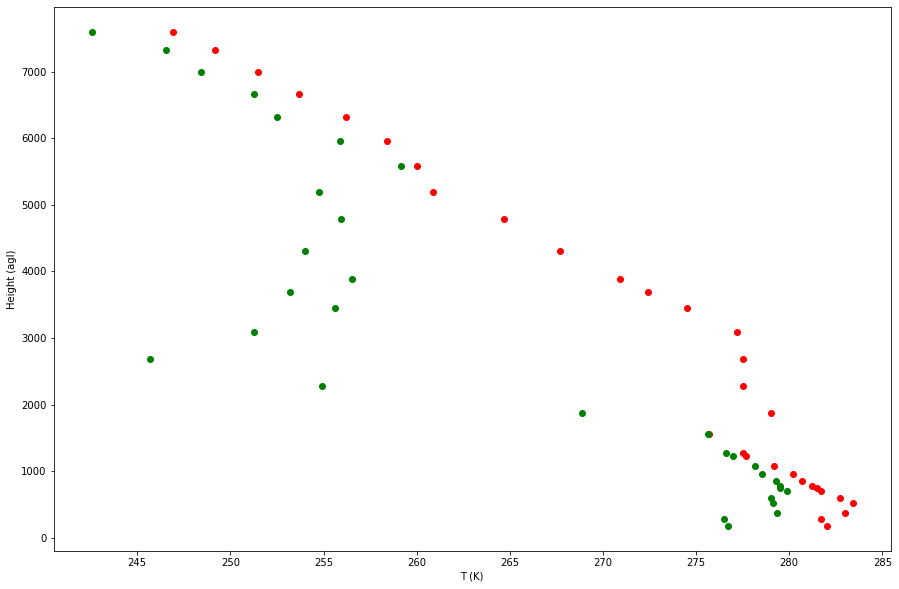

In [6]:
fm = plt.figure(figsize=[15,10])
n=7
T = pymeteo.thermo.T( pset[n]['th'], pset[n]['p'])
Td = pymeteo.thermo.Td( pset[n]['p'], pset[n]['qv'])
plt.plot(T, pset[n]['z'], 'ro')
plt.plot(Td, pset[n]['z'], 'go')

plt.xlabel('T (K)')
plt.ylabel('Height (agl)')

[+] Fetching list of resources available
[-] Parsing list
[+] Fetching dataset 20220510_1500.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 57 profiles
Airport not found  3373
Winner 1


(-88.03999786376953, -87.21999664306641)

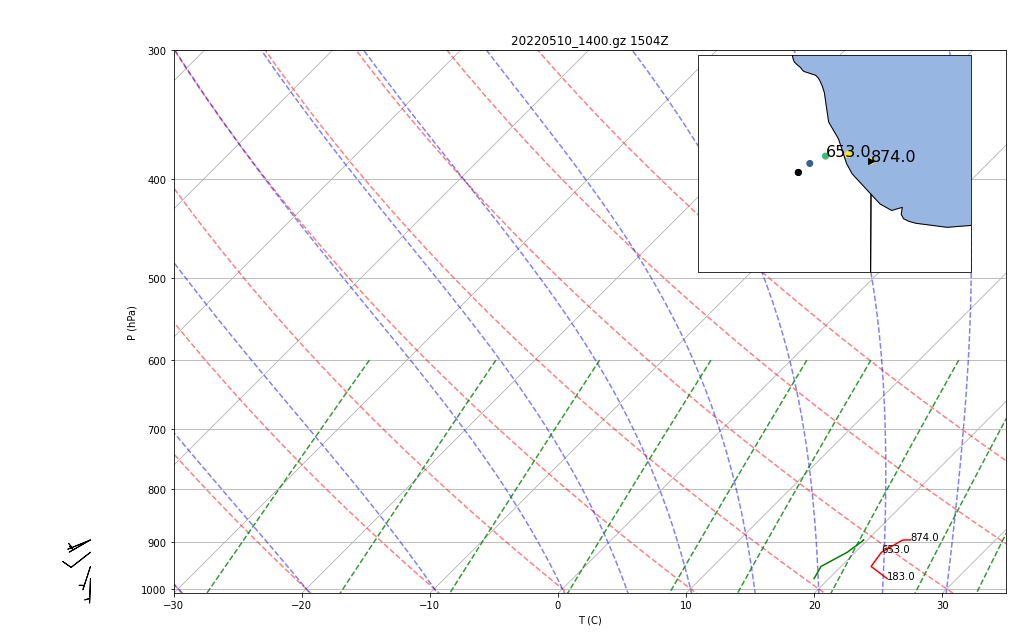

In [66]:
datasets = acars.getAvailableDatasets()
allap = acars.processDataSet(acars.getDataSet(datasets[-1]), debug=False, passthrough=True)
i=0
midway = []
for this_amdar in allap:
    if this_amdar['airport'] == 'MDW':
        this_amdar['dset_file'] = datasets[-2]
        midway.append(this_amdar)
        i+=1
        print('Winner', i)

n = -1
metpy.plots.SkewT
fig=plt.figure(figsize=[15,10])

skew = plots.SkewT(fig, rotation=45)

p = midway[n]['p']
T = midway[n]['T'] # pymeteo.thermo.T( midway[n]['th'], midway[n]['p'])
Td = midway[n]['dp']#  pymeteo.thermo.Td( midway[n]['p'], midway[n]['qv']) #
u =  midway[n]['u']
v =  midway[n]['v']


skew.plot(p/100.0, T-273.15, 'r')
skew.plot(p/100.0, Td-273.15, 'g')
skew.plot_barbs(p/100.0, u, v, xloc=-0.1)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()


plt.xlabel('T (C)')
plt.ylabel('P (hPa)')
plt.title(midway[n]['dset_file'] + ' ' + midway[n]['time'])

decimate = 2

for pp, tt, hh in zip(p[::decimate], T[::decimate], midway[n]['z'][::decimate]):
    skew.ax.text(tt-273.15, pp/100.0, hh)

plt.ylim([1010,300])
plt.xlim([-30.,35.])

axins = inset_axes(plt.gca(), width="40%", height="40%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
#axins.plot(midway[n]['lon'], midway[n]['lat'], 'r-')
mp = axins.scatter(midway[n]['lon'], midway[n]['lat'], c=midway[n]['z'])
axins.add_feature(cartopy.feature.LAKES, zorder=0)
axins.add_feature(cartopy.feature.STATES)
#axcb = inset_axes(plt.gca(), width="10%", height="40%", loc="upper right")
#plt.colorbar(mappable=mp, cax=axcb)
plt.plot(midway[n]['lon'][0], midway[n]['lat'][0], 'ko')
half = int(len(midway[n]['lon'])/2.)

plt.text(midway[n]['lon'][-1], midway[n]['lat'][-1], str(midway[n]['z'][-1]), fontsize=16)
plt.text(midway[n]['lon'][half], midway[n]['lat'][half], str(midway[n]['z'][half]), fontsize=16)

plt.plot(midway[n]['lon'][-1], midway[n]['lat'][-1], 'k>')
plt.ylim([midway[n]['lat'].min()-0.3,midway[n]['lat'].max()+0.3])
plt.xlim([midway[n]['lon'].min()-0.3,midway[n]['lon'].max()+0.3])


[+] Fetching list of resources available
[-] Parsing list
[+] Fetching dataset 20220507_1800.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 43 profiles
Winner 1


IndexError: list index out of range

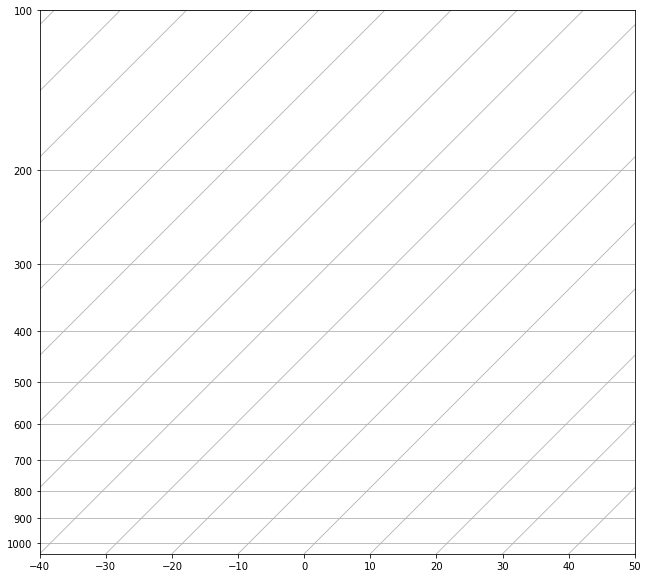

In [50]:
datasets = acars.getAvailableDatasets()
allap = acars.processDataSet(acars.getDataSet(datasets[-1]), debug=False, passthrough=True)
i=0
midway = []
for this_amdar in allap:
    if this_amdar['airport'] == 'HOU':
        this_amdar['dset_file'] = datasets[-1]
        midway.append(this_amdar)
        i+=1
        print('Winner', i)

n = -3
metpy.plots.SkewT
fig=plt.figure(figsize=[15,10])

skew = plots.SkewT(fig, rotation=45)

p = midway[n]['p']
T = midway[n]['T'] # pymeteo.thermo.T( midway[n]['th'], midway[n]['p'])
Td = pymeteo.thermo.Td( midway[n]['p'], midway[n]['qv'])
u =  midway[n]['u']
v =  midway[n]['v']


skew.plot(p/100.0, T-273.15, 'r')
skew.plot(p/100.0, Td-273.15, 'g')
skew.plot_barbs(p/100.0, u, v, xloc=-0.1)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()


plt.xlabel('T (C)')
plt.ylabel('P (hPa)')
plt.title(midway[n]['dset_file'] + ' ' + midway[n]['time'])

decimate = 2

for pp, tt, hh in zip(p[::decimate], T[::decimate], midway[n]['z'][::decimate]):
    skew.ax.text(tt-273.15, pp/100.0, hh)

plt.ylim([1010,300])
plt.xlim([-20.,30.])

axins = inset_axes(plt.gca(), width="40%", height="40%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
#axins.plot(midway[n]['lon'], midway[n]['lat'], 'r-')
mp = axins.scatter(midway[n]['lon'], midway[n]['lat'], c=midway[n]['z'])
axins.add_feature(cartopy.feature.LAKES, zorder=0)
axins.add_feature(cartopy.feature.STATES)
#axcb = inset_axes(plt.gca(), width="10%", height="40%", loc="upper right")
#plt.colorbar(mappable=mp, cax=axcb)
plt.plot(midway[n]['lon'][0], midway[n]['lat'][0], 'ko')
half = int(len(midway[n]['lon'])/2.)

plt.text(midway[n]['lon'][-1], midway[n]['lat'][-1], str(midway[n]['z'][-1]), fontsize=16)
plt.text(midway[n]['lon'][half], midway[n]['lat'][half], str(midway[n]['z'][half]), fontsize=16)

plt.plot(midway[n]['lon'][-1], midway[n]['lat'][-1], 'k>')
plt.ylim([midway[n]['lat'].min()-1.,midway[n]['lat'].max()+1.])
plt.xlim([midway[n]['lon'].min()-1.,midway[n]['lon'].max()+1.])


In [38]:
#Get all Midway soundings
i=0
midway = []
for dsset in datasets:
    print(dsset)
    these_amdars = acars.getDataSet(dsset)
    if these_amdars is not None:
        try:
            for this_amdar in acars.processDataSet(these_amdars):
                if this_amdar['airport'] == 'MDW':
                    this_amdar['dset_file'] = dsset
                    midway.append(this_amdar)
                    i+=1
                    print('Winner', i)
        except:
            print('error prc')
    else:
        print('Sad trombone ', dsset)
    

20220429_0600.gz
[+] Fetching dataset 20220429_0600.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 31 profiles
20220429_0700.gz
[+] Fetching dataset 20220429_0700.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 26 profiles
20220429_0800.gz
[+] Fetching dataset 20220429_0800.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 33 profiles
20220429_0900.gz
[+] Fetching dataset 20220429_0900.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 41 profiles
20220429_1000.gz
[+] Fetching dataset 20220429_1000.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 58 profiles
20220429_1100.gz
[+] Fetching dataset 20220429_1100.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 92 profiles
Winner 1
Winner 2
Winner 3
Winner 4
20220429_1200.gz
[+] Fetching dataset 20220429_1200.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 95 profiles
Winner 5
Winner 6
Winner 7
20220429_1300.gz
[+]

[-] Dataset open with
[-] Found 114 profiles
20220501_1500.gz
[+] Fetching dataset 20220501_1500.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 95 profiles
20220501_1600.gz
[+] Fetching dataset 20220501_1600.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 103 profiles
20220501_1700.gz
[+] Fetching dataset 20220501_1700.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 115 profiles
20220501_1800.gz
[+] Fetching dataset 20220501_1800.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 111 profiles
Winner 56
20220501_1900.gz
[+] Fetching dataset 20220501_1900.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 97 profiles
Airport not found  3373
Winner 57
20220501_2000.gz
[+] Fetching dataset 20220501_2000.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 88 profiles
Airport not found  3373
20220501_2100.gz
[+] Fetching dataset 20220501_2100.gz
[-] Decompressing response data
[-] Dataset

[-] Decompressing response data
[-] Dataset open with
[-] Found 106 profiles
Airport not found  3373
Winner 135
Winner 136
Winner 137
Winner 138
20220503_2200.gz
[+] Fetching dataset 20220503_2200.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 109 profiles
Winner 139
Winner 140
Winner 141
Winner 142
20220503_2300.gz
[+] Fetching dataset 20220503_2300.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 102 profiles
Winner 143
Winner 144
Winner 145
Winner 146
Winner 147
20220504_0000.gz
[+] Fetching dataset 20220504_0000.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 110 profiles
Winner 148
Winner 149
20220504_0100.gz
[+] Fetching dataset 20220504_0100.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 118 profiles
Winner 150
Winner 151
Winner 152
Winner 153
20220504_0200.gz
[+] Fetching dataset 20220504_0200.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 120 profiles
Airport not found  3373
Winner

In [17]:
len(midway)

172

In [20]:
this_amdar

{'i': 64,
 'n': 30,
 'z': array([ 132.     ,  312.99997,  390.     ,  538.     ,  632.     ,
         669.     ,  773.00006,  831.99994,  909.     , 1006.99994,
        1101.     , 1282.     , 1582.     , 1888.9999 , 2145.     ,
        2541.     , 2902.     , 3215.9998 , 3333.     , 3503.     ,
        3784.     , 4077.9998 , 4391.     , 4694.     , 5023.     ,
        5321.     , 5584.0005 , 5847.     , 6361.     , 6645.     ],
       dtype=float32),
 'p': array([98361.984, 96159.44 , 95237.48 , 93490.13 , 92397.01 , 91970.26 ,
        90781.25 , 90113.555, 89249.555, 88161.89 , 87131.07 , 85180.01 ,
        82041.98 , 78950.36 , 76461.59 , 72765.45 , 69551.89 , 66872.35 ,
        65900.53 , 64513.613, 62284.816, 60035.28 , 57729.598, 55581.965,
        53340.42 , 51388.21 , 49724.723, 48115.086, 45118.137, 43543.062],
       dtype=float32),
 'th': array([303.12555, 303.06873, 302.88916, 302.96512, 302.44962, 302.3374 ,
        302.74274, 302.5572 , 302.87375, 303.41727, 303.3974 , 3

[+] Fetching list of resources available
[-] Parsing list
[+] Fetching dataset 20220505_1500.gz
[-] Decompressing response data
[-] Dataset open with
[-] Found 109 profiles
Winner 1


(-95.73800354003906, -94.68300170898438)

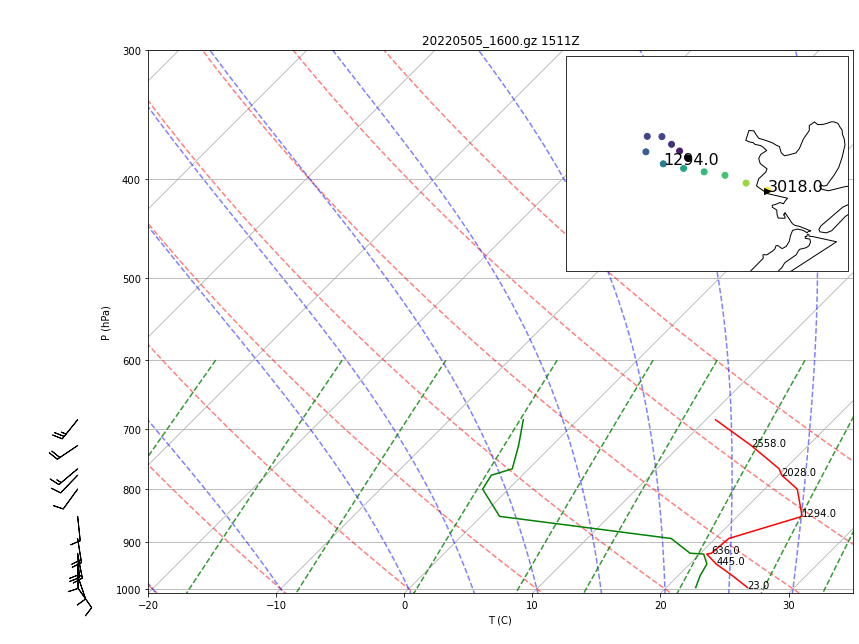

In [18]:
datasets = acars.getAvailableDatasets()
allap = acars.processDataSet(acars.getDataSet(datasets[-2]), debug=False, passthrough=True)
i=0
midway = []
for this_amdar in allap:
    if this_amdar['airport'] == 'HOU':
        this_amdar['dset_file'] = datasets[-1]
        midway.append(this_amdar)
        i+=1
        print('Winner', i)

n = -1
metpy.plots.SkewT
fig=plt.figure(figsize=[15,10])

skew = plots.SkewT(fig, rotation=45)

p = midway[n]['p']
T = midway[n]['T'] # pymeteo.thermo.T( midway[n]['th'], midway[n]['p'])
Td = midway[n]['dp']#  pymeteo.thermo.Td( midway[n]['p'], midway[n]['qv']) #
u =  midway[n]['u']
v =  midway[n]['v']


skew.plot(p/100.0, T-273.15, 'r')
skew.plot(p/100.0, Td-273.15, 'g')
skew.plot_barbs(p/100.0, u, v, xloc=-0.1)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()


plt.xlabel('T (C)')
plt.ylabel('P (hPa)')
plt.title(midway[n]['dset_file'] + ' ' + midway[n]['time'])

decimate = 2

for pp, tt, hh in zip(p[::decimate], T[::decimate], midway[n]['z'][::decimate]):
    skew.ax.text(tt-273.15, pp/100.0, hh)

plt.ylim([1010,300])
plt.xlim([-20.,35.])

axins = inset_axes(plt.gca(), width="40%", height="40%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
#axins.plot(midway[n]['lon'], midway[n]['lat'], 'r-')
mp = axins.scatter(midway[n]['lon'], midway[n]['lat'], c=midway[n]['z'])
axins.add_feature(cartopy.feature.LAKES, zorder=0)
axins.add_feature(cartopy.feature.STATES)
#axcb = inset_axes(plt.gca(), width="10%", height="40%", loc="upper right")
#plt.colorbar(mappable=mp, cax=axcb)
plt.plot(midway[n]['lon'][0], midway[n]['lat'][0], 'ko')
half = int(len(midway[n]['lon'])/2.)

plt.text(midway[n]['lon'][-1], midway[n]['lat'][-1], str(midway[n]['z'][-1]), fontsize=16)
plt.text(midway[n]['lon'][half], midway[n]['lat'][half], str(midway[n]['z'][half]), fontsize=16)

plt.plot(midway[n]['lon'][-1], midway[n]['lat'][-1], 'k>')
plt.ylim([midway[n]['lat'].min()-0.3,midway[n]['lat'].max()+0.3])
plt.xlim([midway[n]['lon'].min()-0.3,midway[n]['lon'].max()+0.3])
